# two-layer non-linear feedforward

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.datasets2 as ds2
import ipynb.fs.full.model as nn

xr = [0, 20, 2]; yr = [0, 10, 1];
cs = [2, 3, -30]
xx, yy, zz = ds2.linear_separable(
    xr, yr, cs)
ds2.plot_dataset(plt, xx, yy, zz)

wi = [4, -5, 10]
xb, yb = nn.decision_boundary(
    xr, yr, wi)
plt.plot(xb, yb, 'g--', lw=2);
plt.show()

In [ ]:
data = [xx, yy, zz]

wi = [4, -5, 10]
alpha = 0.01; epoch = 500

w1, w2, b, sse, mce = nn.slp_learn_err(
    data, wi, alpha, epoch)

plt.figure(figsize=(4,4))
plt.plot(w1)
plt.plot(w2)
plt.plot(b)
plt.legend(['w1', 'w2', 'b'])
plt.xlabel('epoch');
plt.ylabel('params')
plt.grid(); plt.show()

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(sse)
plt.legend(['sse'])
plt.xlabel('epoch');
plt.ylabel('errors')
plt.grid(); plt.show()

print('sse =', sse[-1])

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(mce)
plt.legend(['mce'])
plt.xlabel('epoch');
plt.ylabel('errors')
plt.grid(); plt.show()

print('mce =', mce[-1])

In [ ]:
ds2.plot_dataset(plt, xx, yy, zz)

wf = [w1[-1], w2[-1], b[-1]]
xb, yb = nn.decision_boundary(
    xr, yr, wf)
plt.plot(xb, yb, 'g--', lw=2);
plt.show()

## case 2

In [1]:
import ipynb.fs.full.model as nn
import math as m

x1 = 1
x2 = -1
y1 = nn.perceptron_f(
    [1, -1, -1], [x1, x2], m.tanh)
y2 = nn.perceptron_f(
    [-1, 1, 1], [x1, x2], m.tanh)
z1 = nn.perceptron_f(
    [2, -2, 0], [y1, y2], nn.binary_step)

print('x1 =', x1); print('x2 =', x2)
print('y1 =', y1); print('y2 =', y2)
print('z1 =', z1)

x1 = 1
x2 = -1
y1 = 0.7615941559557649
y2 = -0.7615941559557649
z1 = 1


In [6]:
import ipynb.fs.full.model as nn
import numpy as np
import math as m

tanh = m.tanh; bstp = nn.binary_step
xx1 = []; xx2 = []; yy1 = []; yy2 = [];
zz1 = []

for x2 in np.arange(-2, 2, 0.2):
    for x1 in np.arange(-2, 2, 0.2):
        y1 = nn.perceptron_f(
            [-1, -5, -2], [x1, x2], tanh)
        y2 = nn.perceptron_f(
            [1, -1, 1], [x1, x2], tanh)
        z1 = nn.perceptron_f(
            [2, -2, 0.5], [y1, y2], bstp)
        xx1.append(x1); xx2.append(x2)
        yy1.append(y1); yy2.append(y2)
        zz1.append(z1)
        print(z1, end=' ')
    print()

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 
1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 


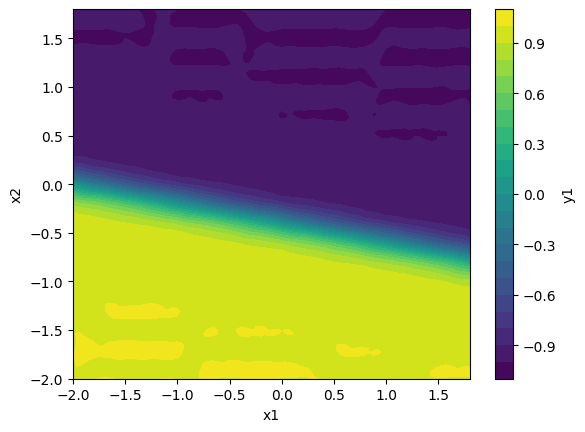

In [8]:
import ipynb.fs.full.datasets2 as ds2
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

xi = np.linspace(min(xx1), max(xx1), 100)
yi = np.linspace(min(xx2), max(xx2), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((xx1, xx2), yy1, (xi, yi),
              method='cubic')

plt.contourf(xi, yi, zi, levels=20,
             cmap='viridis')
plt.colorbar(label='y1')
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()


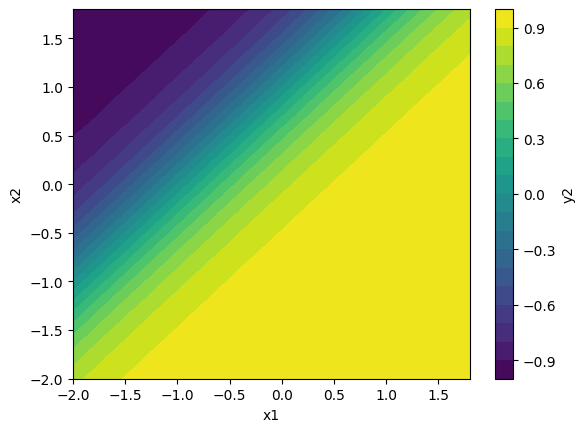

In [9]:
import ipynb.fs.full.datasets2 as ds2
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

xi = np.linspace(min(xx1), max(xx1), 100)
yi = np.linspace(min(xx2), max(xx2), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((xx1, xx2), yy2, (xi, yi),
              method='cubic')

plt.contourf(xi, yi, zi, levels=20,
             cmap='viridis')
plt.colorbar(label='y2')
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()


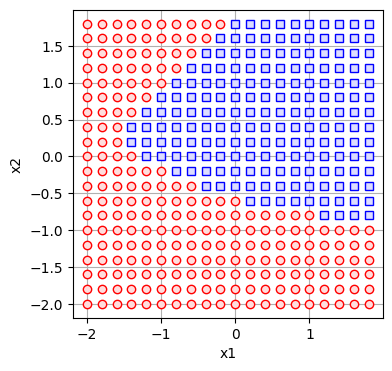

In [10]:
import ipynb.fs.full.datasets2 as ds2
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

ds2.plot_dataset(plt, xx1, xx2, zz1)